In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("health_data.csv")

In [3]:
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [6]:
# 흡연상태에 따른 데이터프레임 분할

smk_No = data[data["흡연상태"] == "No"]
smk_NotNow = data[data["흡연상태"] == "NotNow"]
smk_Yes = data[data["흡연상태"] == "Yes"]

print(smk_No.shape)
print(smk_NotNow.shape)
print(smk_Yes.shape)

(6231, 31)
(1926, 31)
(1841, 31)


(혈청지오티)AST 수치

피우지 않는 경우 : 26.55827922077922
피웠다가 끊은 경우 : 28.467674661105317
피우는 경우 : 30.146288209606986


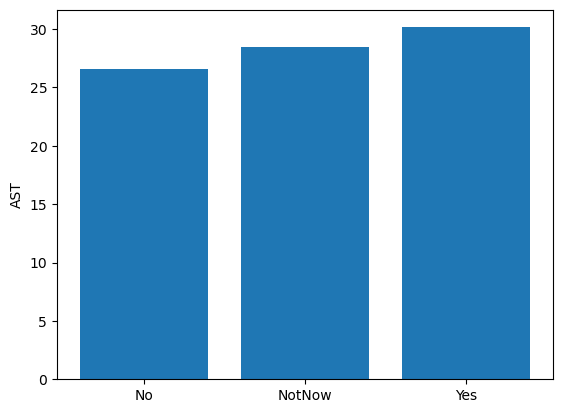

In [108]:
# 흡연 여부에 따른 간 수치 및 치아 상태 확인


# (혈청지오티)AST의 정상치는 0~40이며,세포가 손상되면 농도가 증가
print("(혈청지오티)AST 수치\n")
print("피우지 않는 경우 :", smk_No["(혈청지오티)AST"].mean())  # 비흡연자들의 (혈청지오티)AST 평균값. 
print("피웠다가 끊은 경우 :", smk_NotNow["(혈청지오티)AST"].mean())
print("피우는 경우 :", smk_Yes["(혈청지오티)AST"].mean())

x = ["No", "NotNow", "Yes"]
y = [smk_No["(혈청지오티)AST"].mean(), smk_NotNow["(혈청지오티)AST"].mean(), smk_Yes["(혈청지오티)AST"].mean()]
plt.bar(x, y)
plt.ylabel("AST")
plt.show()

(혈청지오티)ALT 수치

피우지 않는 경우 : 24.280844155844157
피웠다가 끊은 경우 : 29.766423357664234
피우는 경우 : 32.11954148471616


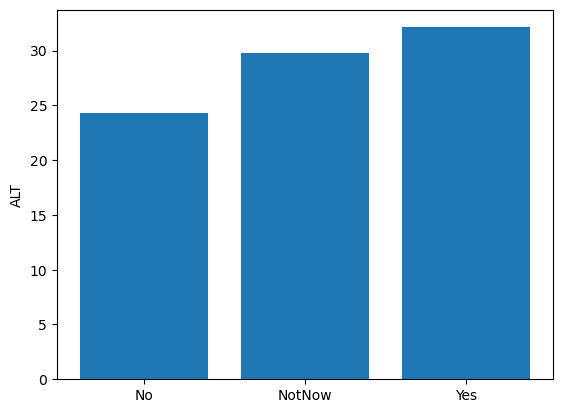

In [109]:
# (혈청지오티)ALT의 정상치는 0~40이며,세포가 손상되면 농도가 증가
print("(혈청지오티)ALT 수치\n")
print("피우지 않는 경우 :", smk_No["(혈청지오티)ALT"].mean())  # 비흡연자들의 (혈청지오티)AST 평균값. 
print("피웠다가 끊은 경우 :", smk_NotNow["(혈청지오티)ALT"].mean())
print("피우는 경우 :", smk_Yes["(혈청지오티)ALT"].mean())

x = ["No", "NotNow", "Yes"]
y = [smk_No["(혈청지오티)ALT"].mean(), smk_NotNow["(혈청지오티)ALT"].mean(), smk_Yes["(혈청지오티)ALT"].mean()]
plt.bar(x, y)
plt.ylabel("ALT")
plt.show()

감마지티피 수치

남성
피우지 않는 경우 : 42.37240075614367
피웠다가 끊은 경우 : 45.840507726269315
피우는 경우 : 62.225352112676056


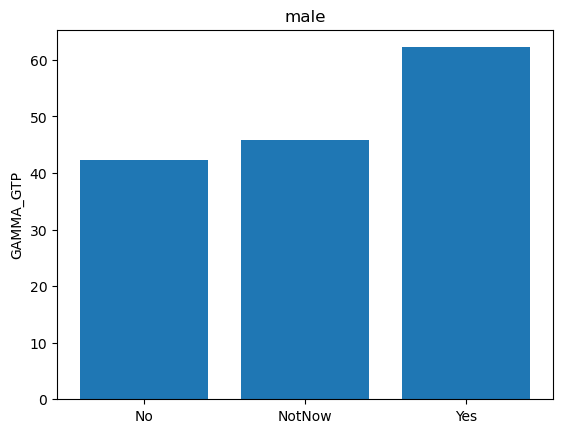


여성
피우지 않는 경우 : 24.458779794445658
피웠다가 끊은 경우 : 31.19811320754717
피우는 경우 : 47.625


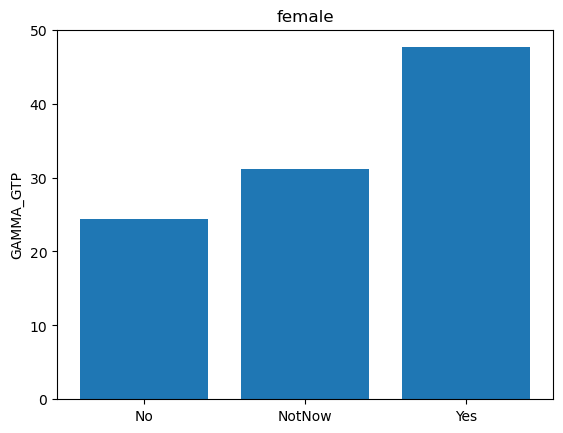

In [110]:
# 감마지티피의 정상치는 남 : 11~63, 여 : 8~35이며 각종 문제로 농도가 증가
print("감마지티피 수치\n")
smk_No_male = smk_No[smk_No["성별코드"] == "M"]
smk_NotNow_male = smk_NotNow[smk_NotNow["성별코드"] == "M"]
smk_Yes_male = smk_Yes[smk_Yes["성별코드"] == "M"]

print("남성")
print("피우지 않는 경우 :", smk_No_male["감마지티피"].mean())  # 비흡연자들의 (혈청지오티)AST 평균값. 
print("피웠다가 끊은 경우 :", smk_NotNow_male["감마지티피"].mean())
print("피우는 경우 :", smk_Yes_male["감마지티피"].mean())

x = ["No", "NotNow", "Yes"]
y = [smk_No_male["감마지티피"].mean(), smk_NotNow_male["감마지티피"].mean(), smk_Yes_male["감마지티피"].mean()]
plt.bar(x, y)
plt.ylabel("GAMMA_GTP")
plt.title("male")
plt.show()

smk_No_female = smk_No[smk_No["성별코드"] == "F"]
smk_NotNow_female = smk_NotNow[smk_NotNow["성별코드"] == "F"]
smk_Yes_female = smk_Yes[smk_Yes["성별코드"] == "F"]

print("\n여성")
print("피우지 않는 경우 :", smk_No_female["감마지티피"].mean())  # 비흡연자들의 (혈청지오티)AST 평균값. 
print("피웠다가 끊은 경우 :", smk_NotNow_female["감마지티피"].mean())
print("피우는 경우 :", smk_Yes_female["감마지티피"].mean())

x = ["No", "NotNow", "Yes"]
y = [smk_No_female["감마지티피"].mean(), smk_NotNow_female["감마지티피"].mean(), smk_Yes_female["감마지티피"].mean()]
plt.bar(x, y)
plt.ylabel("GAMMA_GTP")
plt.title("female")
plt.show()

치석 존재 비중

피우지 않는 경우 0.4571272528672856
피웠다가 끊은 경우 0.4674634794156706
피우는 경우 0.5262368815592204


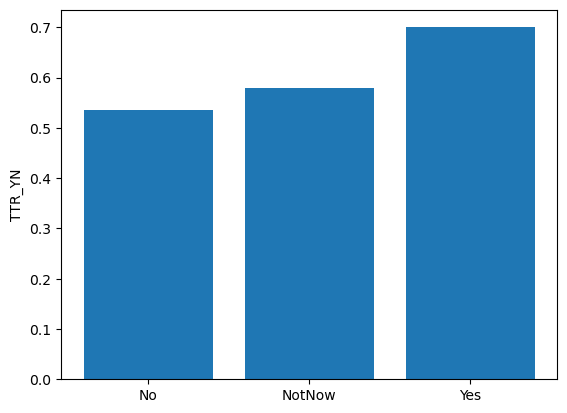

In [111]:
# 치석 존재 여부
print("치석 존재 비중\n")
print("피우지 않는 경우", smk_No["치석"].value_counts()[1]/smk_No["치석"].value_counts().sum())
print("피웠다가 끊은 경우", smk_NotNow["치석"].value_counts()[1]/smk_NotNow["치석"].value_counts().sum())
print("피우는 경우", smk_Yes["치석"].value_counts()[1]/smk_Yes["치석"].value_counts().sum())

x = ["No", "NotNow", "Yes"]
y = [smk_No["치석"].mean(), smk_NotNow["치석"].mean(), smk_Yes["치석"].mean()]
plt.bar(x, y)
plt.ylabel("TTR_YN")
plt.show()

치아우식증 존재 비중

피우지 않는 경우 0.14090660841070454
피웠다가 끊은 경우 0.17928286852589642
피우는 경우 0.2653673163418291


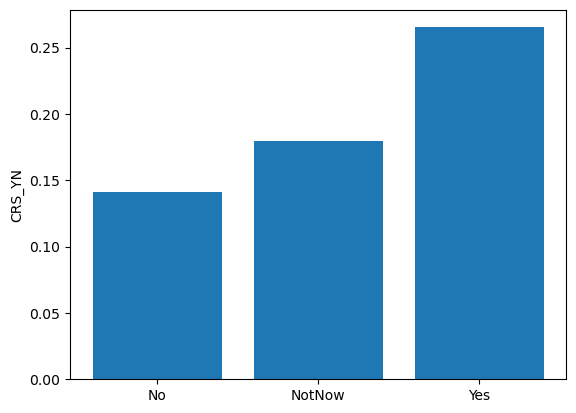

In [112]:
# 치아우식증 존재 여부
print("치아우식증 존재 비중\n")
print("피우지 않는 경우", smk_No["치아우식증유무"].value_counts()[1]/smk_No["치아우식증유무"].value_counts().sum())
print("피웠다가 끊은 경우", smk_NotNow["치아우식증유무"].value_counts()[1]/smk_NotNow["치아우식증유무"].value_counts().sum())
print("피우는 경우", smk_Yes["치아우식증유무"].value_counts()[1]/smk_Yes["치아우식증유무"].value_counts().sum())

x = ["No", "NotNow", "Yes"]
y = [smk_No["치아우식증유무"].mean(), smk_NotNow["치아우식증유무"].mean(), smk_Yes["치아우식증유무"].mean()]
plt.bar(x, y)
plt.ylabel("CRS_YN")
plt.show()

# 시각화 결과
* 흡연 여부에 따른 혈청지오티(AST, ALT), 감마지티피, 치석, 치아우식증 수치 측정 결과, 모든 항목에서 흡연자가 가장 높은 수치를 기록하였고, 흡연을 중단했다 하더라도 비흡연자에 비해 높은 수치를 보였음. 이를 통해 흡연이 간수치 및 치아 건강 전반에 악영향을 끼친다고 판단할 수 있음

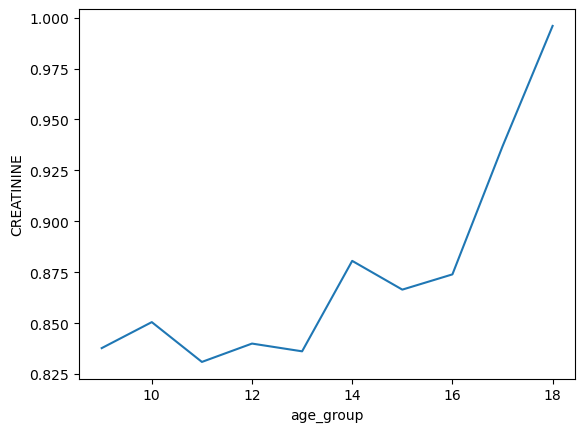

In [106]:
# 연령대와 혈청크레아티닌의 상관관계 파악

x = []
y = []
for i in range(1, 19):
    x.append(i)
    y.append(data[data["연령대코드(5세단위)"]==i]["혈청크레아티닌"].mean())

plt.plot(x, y)
plt.xlabel("age_group")
plt.ylabel("CREATININE")
plt.show()

# 시각화 결과
* 연령대 상승에 따른 혈청크레아티닌 평균값 변화 측정 결과, 연령이 상승할수록 혈청크레아티닌의 평균값도 함께 상승하는 추이를 보임. 혈청크레아티닌이 근육의 발육과 운동에 관계한다는 사실에 미루어 보았을 때, 연령 상승에 따른 운동 능력 저하 및 피부 노화 현상이 혈청크레아티닌 농도 증가와 연관이 있다고 판단할 수 있음

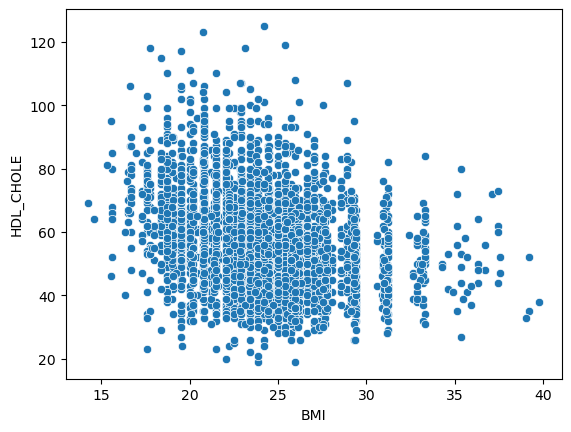

In [139]:
data["BMI"] = data["체중(5Kg 단위)"]/((data["신장(5Cm단위)"]/100)*(data["신장(5Cm단위)"]/100))

sns.scatterplot(data=data, x="BMI", y="HDL콜레스테롤")
plt.xlabel("BMI")
plt.ylabel("HDL_CHOLE")
plt.show()

# 시각화 결과
* BMI 수치에 따른 HDL콜레스테롤 시각화 결과, 두 특성 간 약한 음의 상관관계가 있는 것으로 확인됨. 즉, BMI가 높을수록 HDL 콜레스테롤 수치가 상대적으로 낮아지는데, 이는 혈관 벽에 쌓인 나쁜 콜레스테롤을 없애는 역할을 하는 HDL콜레스테롤의 부족이 BMI지수 상승에 영향을 미친 것으로 판단할 수 있음